<a href="https://colab.research.google.com/github/MeAmarP/yolo-on-OID/blob/master/OID_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Configure YOLO Darknet:
[Follow this Notenook](https://github.com/kriyeng/yolo-on-colab-notebook/blob/master/Tutorial_DarknetToColab.ipynb)

In [1]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [2]:
!wget http://file.ppwwyyxx.com/nvidia/cudnn-10.0-linux-x64-v7.6.4.38.tgz

--2020-01-16 12:38:31--  http://file.ppwwyyxx.com/nvidia/cudnn-10.0-linux-x64-v7.6.4.38.tgz
Resolving file.ppwwyyxx.com (file.ppwwyyxx.com)... 138.68.229.71, 2604:a880:2:d0::21e5:5001
Connecting to file.ppwwyyxx.com (file.ppwwyyxx.com)|138.68.229.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 486406690 (464M) [application/x-gtar-compressed]
Saving to: ‘cudnn-10.0-linux-x64-v7.6.4.38.tgz’

cudnn-10.0-linux-x6 100%[===================>] 463.87M   113MB/s    in 5.3s    

2020-01-16 12:38:37 (88.3 MB/s) - ‘cudnn-10.0-linux-x64-v7.6.4.38.tgz’ saved [486406690/486406690]



In [3]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf /content/cudnn-10.0-linux-x64-v7.6.4.38.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.4
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 4
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [2]:
!git clone https://github.com/kriyeng/darknet/
# %cd /content/darknet

# Check the folder
# !ls

# I have a branch where I have done the changes commented above
# !git checkout feature/google-colab

#Compile Darknet
# !make

# Set execution permissions to Darknet
# !chmod +x ./darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.98 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (6748/6748), done.


In [0]:
# %cd /content/darknet/
# !chmod +x ./darknet

In [3]:
#DOWNLOAD MODELS

!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-01-17 09:47:18--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  44.4MB/s    in 0.8s    

2020-01-17 09:47:19 (44.4 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--2020-01-17 09:47:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  62.8MB/s    in 3.9s    

2020-01-17 09:47:30 (59.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()



# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!/content/dnet_compiled/darknet detect /content/darknet/cfg/yolov3.cfg /content/yolov3.weights /content/darknet/data/person.jpg -dont-show


# Show the result using the helper imgShow()
imShow('predictions.jpg')

/bin/bash: /content/dnet_compiled/darknet: Permission denied


AttributeError: ignored

In [4]:
!git clone https://github.com/harshilpatel312/open-images-downloader.git

KeyboardInterrupt: ignored

+ [8Hours Set of Study/Work Music](https://vimeo.com/360535362)
+ [12Hour Set of Study/Work Music](https://vimeo.com/358547534)

In [39]:
# get the training data
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-annotations-bbox.csv

# get the test data
# !wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-annotations-bbox.csv
# !wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-images.csv

#get labelmap
!wget https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/class-descriptions-boxable.csv

--2020-01-16 13:26:39--  https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train-images-boxable.csv
Resolving requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)... 54.89.53.161, 3.208.44.218, 35.169.169.119
Connecting to requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)|54.89.53.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216137230 (206M) [text/csv]
Saving to: ‘train-images-boxable.csv’

train-images-boxabl 100%[===================>] 206.12M  40.4MB/s    in 5.6s    

2020-01-16 13:26:45 (37.0 MB/s) - ‘train-images-boxable.csv’ saved [216137230/216137230]

--2020-01-16 13:26:50--  https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test-images.csv
Resolving requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)... 54.89.53.161, 3.208.44.218, 35.169.169.119
Connecting to requestor-proxy.figure-eight.com (requestor-proxy.figure-eight.com)|54.89.53.161|:443... c

In [40]:
!python /content/open-images-downloader/downloader/download.py --images=/content/train-images-boxable.csv --annots=/content/train-annotations-bbox.csv --objects Helmet --dir=/content/img_data --labelmap=/content/class-descriptions-boxable.csv



Generating download list for the following objects:  ['bicycle helmet', 'football helmet', 'helmet']

Download %:   0% 0/44159 [00:00<?, ?it/s]
Download %:   0% 1/44159 [00:00<5:34:03,  2.20it/s]
Download %:   0% 6/44159 [00:00<4:01:34,  3.05it/s]
Download %:   0% 15/44159 [00:00<2:51:37,  4.29it/s]
Download %:   0% 21/44159 [00:01<2:15:24,  5.43it/s]
Download %:   0% 25/44159 [00:01<1:41:43,  7.23it/s]
Download %:   0% 31/44159 [00:01<1:15:24,  9.75it/s]
Download %:   0% 37/44159 [00:01<56:38, 12.98it/s]  
Download %:   0% 42/44159 [00:01<51:30, 14.28it/s]
Download %:   0% 46/44159 [00:01<45:19, 16.22it/s]
Download %:   0% 52/44159 [00:02<35:49, 20.52it/s]
Download %:   0% 59/44159 [00:02<29:56, 24.55it/s]
Download %:   0% 64/44159 [00:02<34:39, 21.20it/s]
Download %:   0% 68/44159 [00:02<29:46, 24.68it/s]
Download %:   0% 73/44159 [00:02<27:52, 26.36it/s]
Download %:   0% 78/44159 [00:02<24:13, 30.32it/s]
Download %:   0% 82/44159 [00:02<23:34, 31.16it/s]
Download %:   0% 86/44159 [

In [38]:
import os
len(os.listdir("/content/img_data"))

0

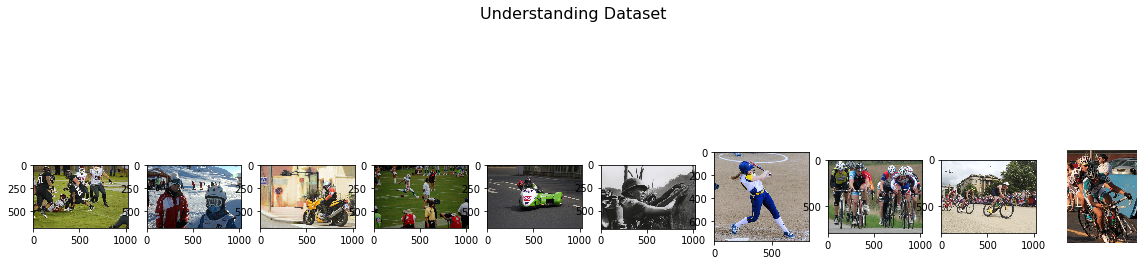

In [6]:
def displaySampleImages(PATH_TO_DIR,Nb_of_Img2Disp=None):
    """
    Display grid of sample images for every class in dataset.
    
    Args:
        PATH_TO_DIR(str): path to train or test dir.        
    """
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['axes.titlesize'] = 8
    import glob
    import cv2
    #NoOfClasses = len(ALL_CLASS_NAMES)   
    fig = plt.figure(figsize=(20,20))
    # fig.subplots_adjust(hspace=0.7, wspace=0.1)
    fig.suptitle('Understanding Dataset', fontsize=16)
    for n,path in enumerate(glob.glob(PATH_TO_DIR+'/*.jpg')[:Nb_of_Img2Disp]):
      #print(ImagePath)
      Img = cv2.imread(path)
      ax = fig.add_subplot(10,10,(n+1))
      plt.imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return

displaySampleImages("/content/img_data",Nb_of_Img2Disp=10)



In [0]:
import pandas as pd
path_to_train_img_csv = "/content/train-images-boxable.csv"
path_to_train_imganno_csv = "/content/train-annotations-bbox.csv"
path_to_classmap_csv = "/content/class-descriptions-boxable.csv" 

# imgdata_df = pd.read_csv(path_to_train_img_csv)
imganno_df = pd.read_csv(path_to_train_imganno_csv)
  

In [0]:
print(imganno_df.head())
print("imganno_df.shape:",imganno_df.shape)
# print(imgdata_df.head())
# print("imgdata_df.shape:",imgdata_df.shape)

In [11]:
labelmap_df = pd.read_csv(path_to_classmap_csv,names=['classid','classname']) 
labelmap_df.head()

,classid,classname
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [12]:
#===============================================================================
### ACTIVE: To Get Helmet CLass specific data
#===============================================================================
classid = labelmap_df[labelmap_df.classname == 'Helmet'].classid
print("ClassID for Helmet Class:",classid)
train_helmet_anno_df = imganno_df.loc[imganno_df.LabelName == '/m/0zvk5']
train_helmet_anno_df['imgclass'] = 0
train_helmet_anno_df=train_helmet_anno_df.reset_index(drop=True)
print(train_helmet_anno_df.head())


#Print no of unique image ids
print("Count of ImageId:", train_helmet_anno_df.ImageID.nunique())
print("dframe Size", train_helmet_anno_df.shape)
print("Column Names:",train_helmet_anno_df.columns)
print("\n\n")

ClassID for Helmet Class: 600    /m/0zvk5
Name: classid, dtype: object
            ImageID  Source LabelName  ...  IsDepiction  IsInside  imgclass
0  00001bcc92282a38  xclick  /m/0zvk5  ...            0         0         0
1  000023aa04ab09ed  xclick  /m/0zvk5  ...            0         0         0
2  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0
3  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0
4  000134de87dd044b  xclick  /m/0zvk5  ...            0         0         0

[5 rows x 14 columns]
Count of ImageId: 7608
dframe Size (16502, 14)
Column Names: Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'imgclass'],
      dtype='object')





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
#ImageID of Image files in a local dir for Class "Helmet"
imgdirids = [imgid.split('.')[0] for imgid in os.listdir("/content/img_data")]
# len(set(train_helmet_anno_df.ImageID.unique()).intersection(set(imgdirids)))

In [24]:
# Add .jpg to ImageID

# train_helmet_anno_df['ImageID'] = train_helmet_anno_df['ImageID']+'.jpg'

#keep relevent columns only remove others
select_cols = ['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin','YMax','imgclass']
train_helmet_anno_df = train_helmet_anno_df[select_cols]

train_helmet_anno_df['bbox_cx'] = (train_helmet_anno_df['XMax'] + train_helmet_anno_df['XMin'])/2.0
train_helmet_anno_df['bbox_cy'] = (train_helmet_anno_df['YMax'] + train_helmet_anno_df['YMin'])/2.0
train_helmet_anno_df['bbox_w'] = train_helmet_anno_df['XMax'] - train_helmet_anno_df['XMin']
train_helmet_anno_df['bbox_h'] = train_helmet_anno_df['YMax'] - train_helmet_anno_df['YMin']

print(train_helmet_anno_df.head())

                ImageID LabelName      XMin  ...   bbox_cy    bbox_w    bbox_h
0  00001bcc92282a38.jpg  /m/0zvk5  0.181875  ...  0.268762  0.194375  0.366792
1  000023aa04ab09ed.jpg  /m/0zvk5  0.272727  ...  0.131731  0.417930  0.263462
2  000134de87dd044b.jpg  /m/0zvk5  0.003125  ...  0.064259  0.088125  0.128518
3  000134de87dd044b.jpg  /m/0zvk5  0.200625  ...  0.060038  0.105625  0.120075
4  000134de87dd044b.jpg  /m/0zvk5  0.623125  ...  0.413696  0.078125  0.095684

[5 rows x 11 columns]


In [34]:
import cv2
from tqdm import tqdm

train_helmet_anno_df['img_w']=''
train_helmet_anno_df['img_h']=''
for idx,row  in tqdm(train_helmet_anno_df.iterrows()):  
  path_to_img ="/content/img_data/"+row['ImageID']
  h,w,_ = (cv2.imread(path_to_img)).shape
  train_helmet_anno_df.at[idx,'img_w'] = w
  train_helmet_anno_df.at[idx,'img_h'] = h

print(train_helmet_anno_df.shape)
print(train_helmet_anno_df.head())


16502it [04:26, 61.94it/s]

(16502, 13)
                ImageID LabelName      XMin  ...    bbox_h  img_w  img_h
0  00001bcc92282a38.jpg  /m/0zvk5  0.181875  ...  0.366792   1024    683
1  000023aa04ab09ed.jpg  /m/0zvk5  0.272727  ...  0.263462   1024    672
2  000134de87dd044b.jpg  /m/0zvk5  0.003125  ...  0.128518   1024    683
3  000134de87dd044b.jpg  /m/0zvk5  0.200625  ...  0.120075   1024    683
4  000134de87dd044b.jpg  /m/0zvk5  0.623125  ...  0.095684   1024    683

[5 rows x 13 columns]


Below code to validate our results, regarding the bbox format required by YOLO

(186, 58)
(385, 308)
199.03999999999996
250.518936


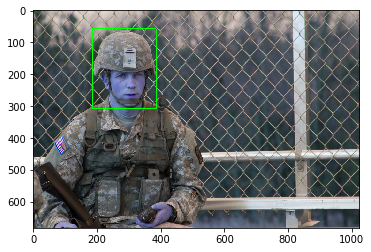

In [48]:
# Write routine to display labelled objects in training image dataset
# This is just to understand and check how to normalize-dnormalize bbox values

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread("/content/img_data/00001bcc92282a38.jpg")
h,w,_ = img.shape

for _,row in train_helmet_anno_df[train_helmet_anno_df.ImageID == "00001bcc92282a38.jpg"].iterrows():
  ## print(row[['YMin', 'XMin', 'YMax', 'XMax']].values.tolist())
  pxl_xmin = int(row['XMin']*w)
  pxl_xmax = int(row['XMax']*w)
  pxl_ymin = int(row['YMin']*h)
  pxl_ymax = int(row['YMax']*h)
  print((pxl_xmin,pxl_ymin))
  print((pxl_xmax,pxl_ymax))
  img = cv2.rectangle(img,(pxl_xmin,pxl_ymin),(pxl_xmax,pxl_ymax),(0,255,0),2)
plt.imshow(img)
# cv2_imshow(img)

print("BoundigBow_W in pxl",train_helmet_anno_df.bbox_w[0]*train_helmet_anno_df.img_w[0])
print("BoundigBow_H in pxl",train_helmet_anno_df.bbox_h[0]*train_helmet_anno_df.img_h[0])

In [49]:
train_helmet_anno_df.shape

(16502, 13)

In [50]:
#===============================================================================
### ACTIVE: To geneate and save bbox details in .txt file for each image
#===============================================================================
from tqdm import tqdm


for imgid in tqdm(train_helmet_anno_df.ImageID.unique()):
  df=train_helmet_anno_df.loc[train_helmet_anno_df.ImageID == imgid ]
  df=df[['imgclass','bbox_cx', 'bbox_cy', 'bbox_w','bbox_h']]
  path_to_save = '/content/img_data/'+imgid+'.txt'
  df.to_csv(path_to_save, header=None, index=None, sep=' ')

#check no of file generated
import glob
print("\n Nb. Of File generated:",len(glob.glob('/content/img_data/*.txt')))

100%|██████████| 7608/7608 [00:24<00:00, 316.96it/s]

Nb Of File generated: 7608


In [66]:
#create .txt files train.txt & valid.txt with absolute path of the image
# total image we have are 7608 lets split: train = 6000 rest for test.
from tqdm import tqdm

AllImgID = train_helmet_anno_df.ImageID.unique()

train_img = AllImgID[:6000]
train_img = ['/content/img_data/'+pathimg for pathimg in train_img]

test_img = AllImgID[6000:]
test_img = ['/content/img_data/'+pathimg for pathimg in test_img]


with open("test.txt", "w") as output:
  for item in tqdm(test_img):    
    output.write(str(item)+'\n')

# print("Total helmet imgs",len(AllImgID))
# print("train helmet size",len(train_img))
# print("test helmet size",len(test_img))

100%|██████████| 1608/1608 [00:00<00:00, 446297.04it/s]


In [68]:
# YOLO Preps:
# !wget https://pjreddie.com/media/files/yolov3-tiny.weights
# !wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg

--2020-01-15 13:50:09--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3-tiny.cfg’

yolov3-tiny.cfg         [ <=>                ] 104.22K  --.-KB/s    in 0.04s   

2020-01-15 13:50:09 (2.67 MB/s) - ‘yolov3-tiny.cfg’ saved [106718]

